In [ ]:
# for the CNN
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

In [ ]:
def create_model(regularizer, initializer, activation='relu',optimizer='adam'):
# create model
    model = Sequential()
    model.add(Conv1D( filters = 5, kernel_size = 11,
                 kernel_regularizer = regularizer,
                 kernel_initializer = initializer,
                 activation = activation,
                 input_shape = input_shape
                ))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters = 3, kernel_size = 7, activation = activation))
    model.add(Flatten())
    model.add(Dense(10, activation = activation))
    model.add(Dropout(0.2))
    model.add(Dense(N_categ, activation = 'softmax' ))
    
    print(model.summary())

# compile model
    model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = optimizer, metrics = ['accuracy'])
    
    return model

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


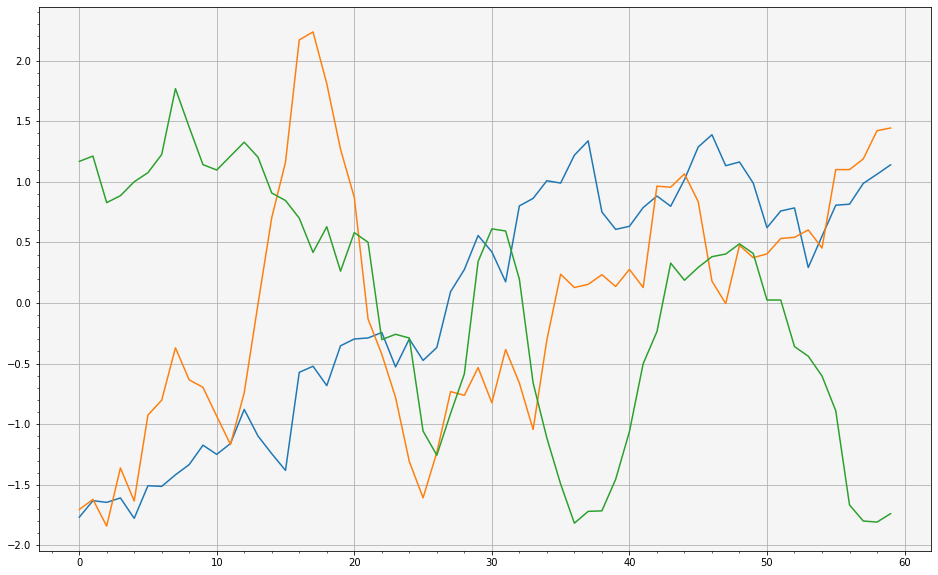

10000 8000 2000 60


In [ ]:
# str0 = 'ts_comp_N10000'
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000'
fnamex = '../DATA1/x_' + str0 + '.txt'
fnamey = '../DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

# comment this part the first time
# without this the model is terrible
xm = x.mean(axis=1) # mean of each row
for n in range(N):
    x[n] = x[n] - xm[n] # we are shifted in the center, we are removing the mean
    
xstd = x.std(axis = 1) # standard deviation
for n in range(N):
    x[n] = x[n] / xstd[n]
    
    #now our data are whitin units

plt.figure(figsize=(16,10))
plt.xticks()
plt.minorticks_on()
plt.style.use('seaborn-ticks')
ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.grid()
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

### DATA reshaping

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


### Convolutional NN

Adam with regularizer L1

In [ ]:
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers

regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                130       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [ ]:
for obs in ('accuracy', 'loss'):
    plt.plot(fit.history[obs], 'r', label = obs +' of training data')

     
    plt.figure(figsize=(16,10))
    plt.xticks()
    plt.minorticks_on()
    plt.style.use('seaborn-ticks')
    ax = plt.axes()
    ax.set_facecolor("whitesmoke")
    plt.grid()
    
    plt.plot(fit.history['val_' + obs], 'b--', label = obs + ' of validation data')
    plt.title('Adam L1')
    plt.ylabel(obs)
    plt.xlabel('epochs')
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()

NameError: name 'plt' is not defined

SGD with L1

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_1 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

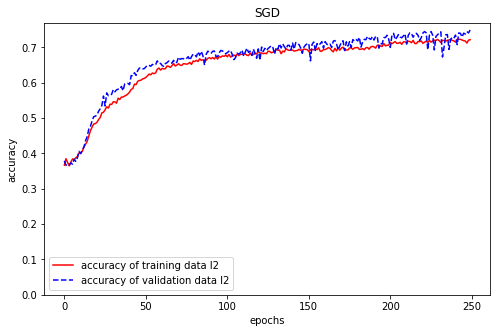

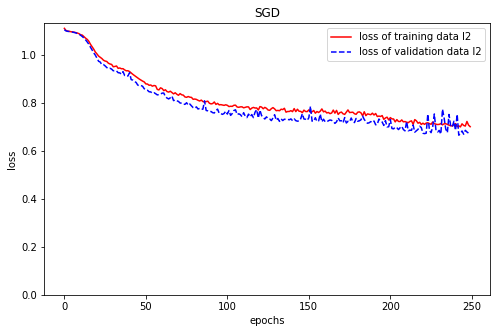

In [ ]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize = (8,5))
    plt.plot(fit1.history[obs], 'r', label = obs +' of training data l2')
    plt.plot(fit1.history['val_' + obs], 'b--', label = obs + ' of validation data l2')
    plt.title('SGD')
    plt.ylabel(obs)
    plt.xlabel('epochs')
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()

### Now we are using L2 regularizer

Adam with L2

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_2 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

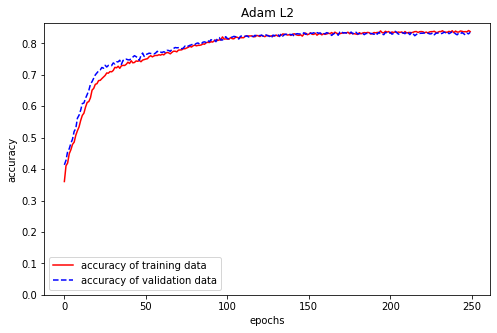

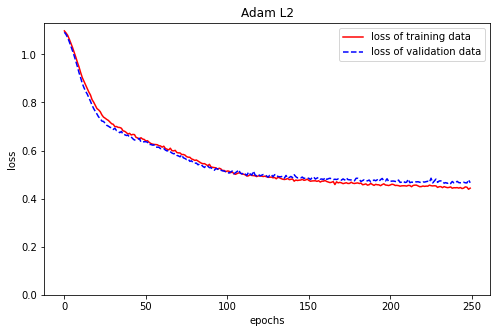

In [ ]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize = (8,5))
    plt.plot(fit3.history[obs], 'r', label = obs +' of training data')
    
    plt.plot(fit3.history['val_' + obs], 'b--', label = obs + ' of validation data')
    plt.title('Adam L2')
    plt.ylabel(obs)
    plt.xlabel('epochs')
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()

SGD with L2

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_3 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_3 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

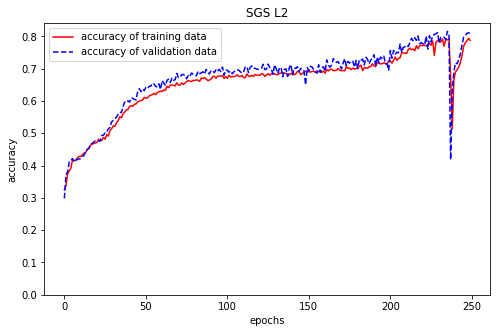

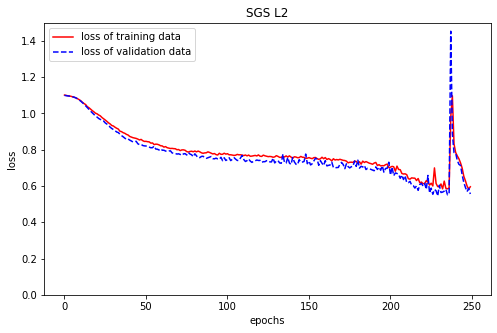

In [ ]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize = (8,5))
    plt.plot(fit4.history[obs], 'r', label = obs +' of training data')
    
    plt.plot(fit4.history['val_' + obs], 'b--', label = obs + ' of validation data')
    plt.title('SGS L2')
    plt.ylabel(obs)
    plt.xlabel('epochs')
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


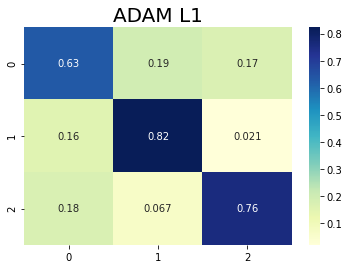

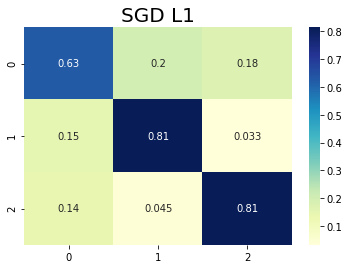

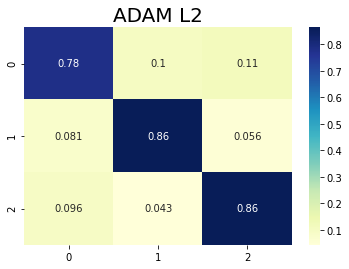

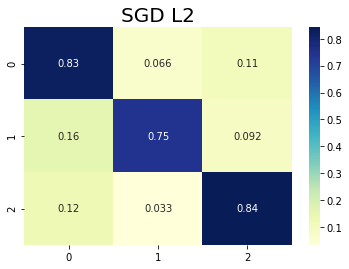

In [ ]:
import seaborn
import sklearn.metrics as skm
from sklearn.metrics import plot_confusion_matrix

y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()


In [ ]:
print(confusion_matrix.trace())
print(confusion_matrix1.trace())
print(confusion_matrix3.trace()) # biggest
print(confusion_matrix4.trace())

2.2141271706489096
2.2500956728842785
2.506541774157966
2.4209156682919803


The best algorithm is Adam with regularizer L2

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
scaler = StandardScaler()

X_df = pd.DataFrame(data.data, columns=data.feature_names)
X_df = scaler.fit_transform(X_df)
y_df = pd.DataFrame(data.target, columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)
And store it in a similar dictionary:

from sklearn.metrics import confusion_matrix
cf_matrix = dict.fromkeys(classifiers.keys())
for key, classifier in classifiers.items(): 
    y_pred = classifier.fit(X_train, y_train.values.ravel()).predict(X_test)
    cf_matrix[key]=confusion_matrix(y_test, y_pred)
Then you can plot it:

fig, axn = plt.subplots(1,5, sharex=True, sharey=True,figsize=(12,2))

for i, ax in enumerate(axn.flat):
    k = list(cf_matrix)[i]
    sns.heatmap(cf_matrix[k], ax=ax,cbar=i==4)
    ax.set_title(k,fontsize=8)

SyntaxError: invalid syntax (<ipython-input-15-562e0fa81415>, line 16)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe671672-af6a-4685-87e3-e4b820a4c76e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>